# Brief introduction to differential privacy


Differential privacy promises to protect individuals from any
additional harm that they might face due to their data being in the private database $x$
that they would not have faced had their data not been part of $x$. Although individuals may indeed face harm once the results $M(x)$ of a differentially private mechanism $M$
have been released, differential privacy promises that the probability of
harm was not significantly increased by their choice to participate. 


###### Definition a. (Randomized Algorithm).

A randomized algorithm $M$ with domain $A$ and discrete range $B$ is associated with a mapping
$M :\; A \to \delta(B)$. On input $a \in A$, the algorithm $M$ outputs $M(a) = b$
with probability $(M(a))_b$ for each $b\in B$. The probability space is over
the coin flips of the algorithm $M$.

###### Defition b.(Differential Privacy).
A randomized algorithm $M$ with domain $N^{|X|}$ is $(\epsilon ; \delta)$-differentially private if for all $S \subseteq Range(M)$ and for all $x,y \in N^{|X|}$ such that  $|| x - y||_1 \leq 1$

$$ Pr[ M(x) \in S ] \leq e^\epsilon \cdot Pr[ M(y) \in S] + \delta $$

where the probability space is over the coin flips of the mechanism $M$.
If $\delta = 0$, we say that $M$ is $\epsilon$-differentially private.

.


The quantity:

$$L^{s}_{M(x)||M(y)} = ln \Bigg(  \frac{Pr[M(x)=s]}{Pr[M(y)=s]} \Bigg)$$

is important to us; we refer to it as the privacy loss incurred by observing $s$. This loss might be positive (when an event is more likely under $x$ than under $y$) or it might be negative (when an event is more likely under $y$ than under $x$). So $(\epsilon; \delta)$-differential privacy ensures that for all adjacent $x, y$, the absolute value of the privacy loss will be bounded by $\epsilon$ with probability at least $1 - \delta$.


# Differential privacy under continual observation

Many applications of data analysis involve repeated computations,
either because the entire goal is one of monitoring of, for example, traffic conditions, search trends,
or incidence of influenza. In such applications the system is required to continually produce outputs. We there-
fore need techniques for achieving *differential privacy under continual observation*.

So to achieve this goal we can do many different things, but firstly let's make some definitions.


###### Definition 1. event-level privacy
We think of data streams as being of unbounded length; while *prefixes* have finite length. 
Data streams $S$ and $S^{'}$ are ***event level*** adjacent if they differ only in a single time for a single element $u, u^{,} \in X$, such that $S(t)= u \ne u^{,} = S^{'}(t)$.
We define ***event level*** adjacency for stream prefixes analogously.


.

###### Definition 2. user-level privacy
Let $X$ be the universe of possible input symbols. Let $S$ and $S^{'}$ be stream prefixes (i.e., finite streams) of symbols drawn from $X$. Then $Adj(S; S^{'})$ ($S$ is adjacent to $S^{′}$) if and only if there exist $a, b \in X$
so that if we change some of the instances of $a$ in $S$ to instances of $b$,
then we get $S^{′}$. More formally, $Adj(S,S^{'} \quad iff \exists R \subseteq |S|$, such that $S|_{R: a \to b} = S^{'}$.
Here,$R$ is a set of indices in the stream prefix $S$, and $S|_{R: a \to b} = S^{'}$ is the result of replacing all the occurrences of $a$ at these indices with $b$. Note that adjacent prefixes are always of the same
length.

To capture event-level privacy, we restrict the definition of adjacency to the case
$|R|\leq 1$. To capture user-level privacy we do not constrain the size of $R$ in the definition of adjacency.


.



There are three natural options for $(\epsilon , 0)$ differential privacy for event level privacy:

1. Use randomized response for each time period and add this randomized value to the counter;
2. Add noise distributed according to $Lap(1= \epsilon)$ to the true value for each time step and add this perturbed value to the counter;
3. Compute the true count at each time step, add noise distributed according to $Lap(T/\epsilon)$ to the count, and release this noisy count.

So let's see the behaviour of this 3 easy algorithms.

### DATA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 2**10
visit_sparse = np.random.choice([0,1], size= n, p=[0.9,0.1])
visit_dense = np.random.choice([0,1], size= n, p=[0.3,0.7])
counter_sparse = np.cumsum(visit_sparse)
counter_dense = np.cumsum(visit_dense)

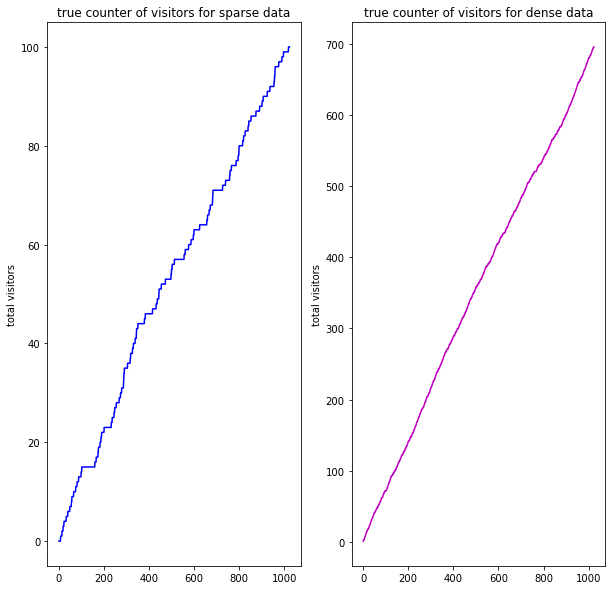

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(counter_sparse,'b-')
plt.ylabel('total visitors')
plt.title('true counter of visitors for sparse data')
plt.subplot(122)
plt.plot(counter_dense,'m-')
plt.ylabel('total visitors')
plt.title('true counter of visitors for dense data')
plt.show()

###### 1. Randomized response method

This algorithm is used usually to hide the answer of single person in a survey related to embarrassing and personal things. Flip a coin if head say the true otherwise flip it again and answer yes if head otherwise no.

$$\hat p = \frac{3}{4} p + \frac{1}{4} (1-p)$$ then, 

$$ p = 2 \hat p - \frac{1}{2}$$

So we can update the counter using $c = p \cdot t$

and for the general case we have that:

$$\hat p = \alpha p + (1 - \alpha)\alpha  p + (1 - \alpha)\alpha (1-p)$$

so, 

$$ p = \frac{\hat p + \alpha^2 - \alpha}{\alpha}$$

In [34]:
np.mean(np.random.binomial(1,1,size=10000))

1.0

In [40]:
def randomize_response(eps, visit):
    noise_visitors = list()
    prob = 0.5 + eps 
    for i in visit:
        ob = np.random.binomial(1,prob)
        if ob == 1:
            noise_visitors.append(i)
        else:
            ob = np.random.binomial(1,prob)
            if ob==1:
                noise_visitors.append(1)
            else:
                noise_visitors.append(0)
    return(noise_visitors)

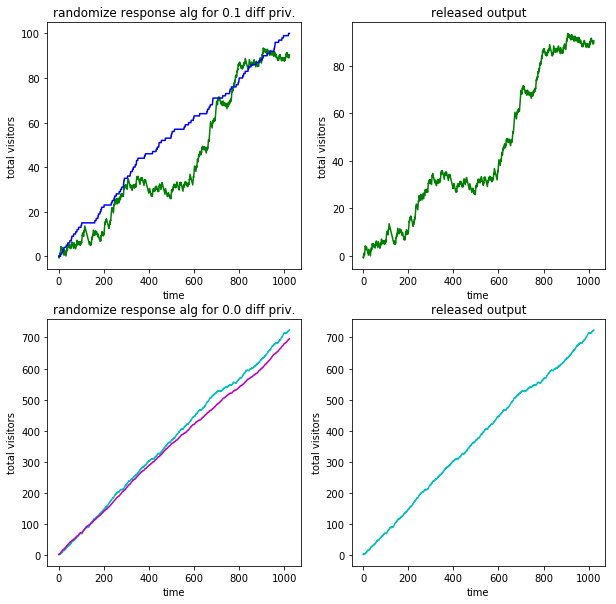

In [47]:
# randomize response method
eps_dense = 0.01
eps_sparse = 0.1
noise_visitors_dense = randomize_response(eps=eps_dense, visit= visit_dense)
noise_visitors_sparse = randomize_response(eps=eps_sparse, visit= visit_sparse)

alpha_dense = (1/2 + eps_dense)
randomized_counter_dense = (1/alpha_dense)*(np.cumsum(np.array(noise_visitors_dense))\
                                      + (alpha_dense**2 - alpha_dense)*np.arange(1,n+1))

alpha_sparse = (1/2 + eps_sparse)
randomized_counter_sparse = (1/alpha_sparse)*(np.cumsum(np.array(noise_visitors_sparse))\
                                      + (alpha_sparse**2 - alpha_sparse)*np.arange(1,n+1))

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(randomized_counter_sparse, 'g-')
plt.plot(counter_sparse, 'b-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('randomize response alg for %.1f diff priv.'%(eps_sparse))
plt.subplot(222)
plt.plot(randomized_counter_sparse, 'g-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('released output')
plt.subplot(223)
plt.plot(randomized_counter_dense,'c-')
plt.plot(counter_dense, 'm-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('randomize response alg for %.1f diff priv.'%(eps_dense))
plt.subplot(224)
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('released output')
plt.plot(randomized_counter_dense, 'c-')
plt.show()

##### 2. Add noise distributed according to $Lap(1/\epsilon)$ to data.

We want to reach $(\epsilon , 0)$ differential privacy since we know that the Laplacian method respect:
$$Pr[M(x) \in S] \leq e^{\epsilon} Pr[M(y) \in S]$$

for $|x - y|_{1} = 1$

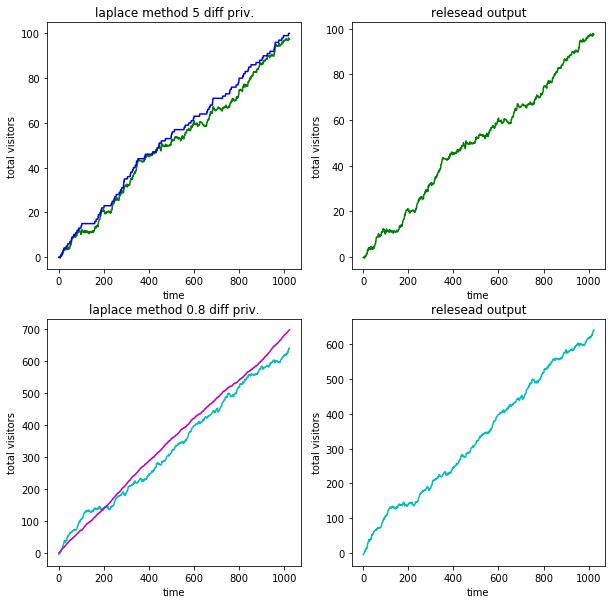

In [51]:
# add noise distributed according to Lap(1/epsilon) to the data
eps_sparse = 5
eps_dense = 0.8
tau_sparse = np.random.laplace(scale=(1/eps_sparse), size = n)
tau_dense = np.random.laplace(scale=(1/eps_dense), size = n)

counter_with_naive_sanitizer_sparse = np.cumsum(visit_sparse + tau_sparse)
counter_with_naive_sanitizer_dense = np.cumsum(visit_dense + tau_dense)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(counter_with_naive_sanitizer_sparse, 'g-')
plt.plot(counter_sparse, 'b-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('laplace method %i diff priv.'%(eps_sparse))
plt.subplot(222)
plt.title('relesead output')
plt.xlabel('time')
plt.ylabel('total visitors')
plt.plot(counter_with_naive_sanitizer_sparse, 'g-')
plt.subplot(223)
plt.plot(counter_with_naive_sanitizer_dense,'c-')
plt.plot(counter_dense, 'm-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('laplace method %.1f diff priv.'%(eps_dense))
plt.subplot(224)
plt.title('relesead output')
plt.xlabel('time')
plt.ylabel('total visitors')
plt.plot(counter_with_naive_sanitizer_dense, 'c-')
plt.show()

##### 3. Compute the true count at each time step and add noise.

We want to sample the noise from $Lap(T / \epsilon)$ and add to the counter for the property of addition in differential privacy.

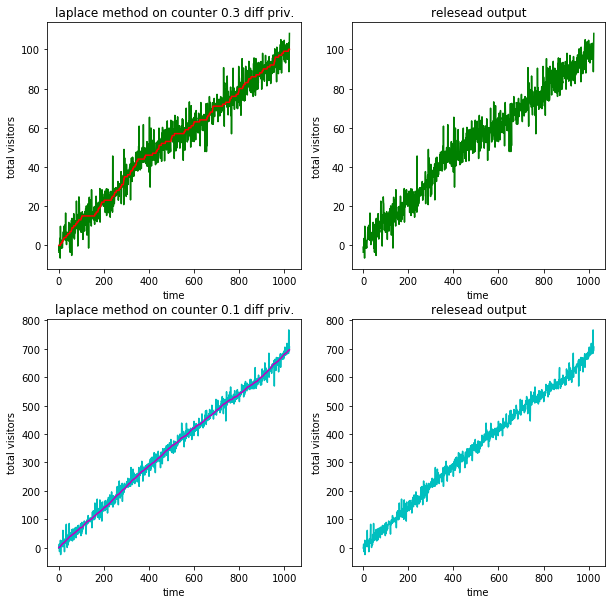

In [52]:
# add noise distributed according to Lap(T/epsilon) to the counter
eps_sparse = 0.3*len(visit_sparse)
eps_dense = 0.1*len(visit_dense)
tau_sparse = np.random.laplace(scale=n/eps_sparse, size = n)
tau_dense = np.random.laplace(scale=n/eps_dense, size = n)

counter_with_naive_sanitizer_sparse = counter_sparse + tau_sparse
counter_with_naive_sanitizer_dense = counter_dense + tau_dense

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(counter_with_naive_sanitizer_sparse, 'g-')
plt.plot(counter_sparse, 'r-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('laplace method on counter %.1f diff priv.'%(eps_sparse/len(visit_sparse)))
plt.subplot(222)
plt.title('relesead output')
plt.xlabel('time')
plt.ylabel('total visitors')
plt.plot(counter_with_naive_sanitizer_sparse, 'g-')
plt.subplot(223)
plt.plot(counter_with_naive_sanitizer_dense,'c-')
plt.plot(counter_dense, 'm-')
plt.ylabel('total visitors')
plt.xlabel('time')
plt.title('laplace method on counter %.1f diff priv.'%(eps_dense/len(visit_dense)))
plt.subplot(224)
plt.title('relesead output')
plt.xlabel('time')
plt.ylabel('total visitors')
plt.plot(counter_with_naive_sanitizer_dense, 'c-')
plt.show()

All of these options result in noise on the order of at least $\Omega(\sqrt{T}/ \epsilon)$

How we can see from the dense and the sparse data that the counter with the *naive* implementation of differential privacy, respect the privacy in both cases but, although it's not too bad accuracy for the dense data, it is too noisy for the sparse data! And the application in the case of sparse data is the most interesting... since it's obviously that if we have more it's easier to hide the information.
So we can improve this result using Dynamic counters that use also accumulators.

### Naive accumulator method

This last method use the concept of segments...

![alt text](not_pan_private.png)

![alt text](segment.png)

In [53]:
def Dynamic_no_pan_counter(eps, data):
    T = len(data)
    loo =  np.log2(T)/ eps 
    count = np.random.laplace(scale=loo)
    # initialize
    count = count + data[0]
    ret = [count]
    m = int(np.log2(T))
    values_levels = [count for _ in range(m+1)]
    s = list()
    for i in range(0,m):
        s.append([0 for _ in range(int(T/(2**(i+1))))])
    
    for t in range(1,len(data)):
        bi_t = np.binary_repr(t, width=m+1)
        bi_t_meno_1 = np.binary_repr(t - 1, width=m+1)
        binary_rapr_t = np.array([int(i) for i in bi_t])
        binary_rapr_t_meno_1 = np.array([int(i) for i in bi_t_meno_1])
        for i in np.argwhere((binary_rapr_t!=binary_rapr_t_meno_1)==1): # this init new  itervals
            if binary_rapr_t[i[0]]==0:
                values_levels[i[0]] = np.random.laplace(scale=loo)
                
        for l in range(m+1): # this is to update the active intervals
            if binary_rapr_t[l]==0:
                values_levels[l] += data[t]
    
        result = 0
        if binary_rapr_t[-1]==0:
            result = values_levels[-1]
        for i in range(m,-1,-1): # return the noisy value
            if binary_rapr_t[i]==1:
                result += values_levels[i]
        
        ret.append(result)
                
    return(ret)    

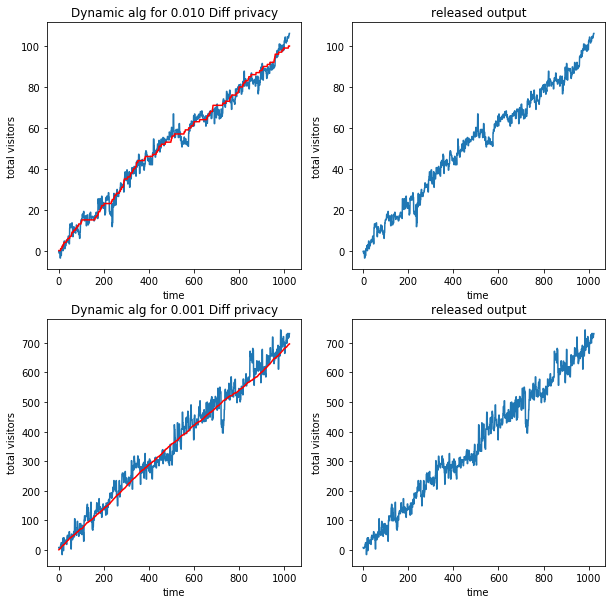

In [56]:
eps_sparse = 0.01*len(visit_sparse)
eps_dense = 0.001*len(visit_dense)

cipher_sparse = Dynamic_no_pan_counter(data= visit_sparse, eps=eps_sparse)
cipher_dense = Dynamic_no_pan_counter(data= visit_dense, eps= eps_dense)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(cipher_sparse)
plt.plot(counter_sparse, 'r-')
plt.ylabel('total visitors')
plt.title('Dynamic alg for %.2f Diff privacy'%(eps_sparse/len(visit_sparse)))
plt.xlabel('time')
plt.subplot(222)
plt.ylabel('total visitors')
plt.title('released output')
plt.xlabel('time')
plt.plot(cipher_sparse)
plt.subplot(223)
plt.plot(cipher_dense)
plt.plot(counter_dense, 'r-')
plt.ylabel('total visitors')
plt.title('Dynamic alg for %.3f Diff privacy'%(eps_dense/len(visit_dense)))
plt.xlabel('time')
plt.subplot(224)
plt.plot(cipher_dense)
plt.ylabel('total visitors')
plt.title('released output')
plt.xlabel('time')
plt.show()

In this last algorithm is possible to proof that the  the expected error is tightly concentrated around $O[(log_2(T))^{\frac{3}{2}}]$
The maximum expected error, over all times t, is on the order of $O[(log_2(T))^{\frac{5}{3}}]$.


.




But the main problem of the previous Alg is that is not pan-private secure!!!!

##### Pan Privacy
An algorithm **Alg** mapping data stream prefixes to the range $I\times\sigma$, (where I denote the set of possible internal states of the algorithm, and $\sigma$ the set of possible output sequences; we assume that the adversary can only observe internal states and the output sequence), is ***pan-private against a single intrusion*** if for all sets $I^{'} \subseteq I$ of internal states and $\sigma^{'} \subseteq \sigma$ of output sequences, and for all pairs of adjacent data stream prefixes $S,S^{'}$

$$Pr\big[ Alg (S) \in (I^{'},\sigma^{'})\big]) \leq e^{\epsilon} Pr\big[ Alg (S^{'}) \in (I^{'},\sigma^{'})\big],$$

where the probability space are over the coin flips of the algorithm **Alg**.

### Accumulator with pan-private security

![alt text](pan_private.png)

![alt text](segment.png)

In [57]:
def Dynamic_counter(eps, data):
    T = len(data)
    loo =  (1 + np.log2(T))/ eps 
    count = np.random.laplace(scale=loo)
    # initialize
    count = count + data[0]
    ret = [count]
    m = int(np.log(T))
    s = list()
    for i in range(0,m):
        s.append([0 for _ in range(int(T/(2**(i+1))))])
    nu = [0 for _ in range(m)]
    for t in range(1,len(data)):
            for i in range(0,m):
                ind = s[i].index(0)
                if ind == 0:
                    nu[i] = np.random.laplace(scale=loo)
                    s[i][0] = nu[i]

                    if len(s[i])==1:
                        s[i] = [0 for _ in range(len(s[i]))]                    
                elif ind==(len(s[i])-1):
                    s[i] = [0 for _ in range(len(s[i]))]
                else:
                    s[i][ind]= nu[i]
            ret.append(sum(nu)+ data[t])
    return(ret)    

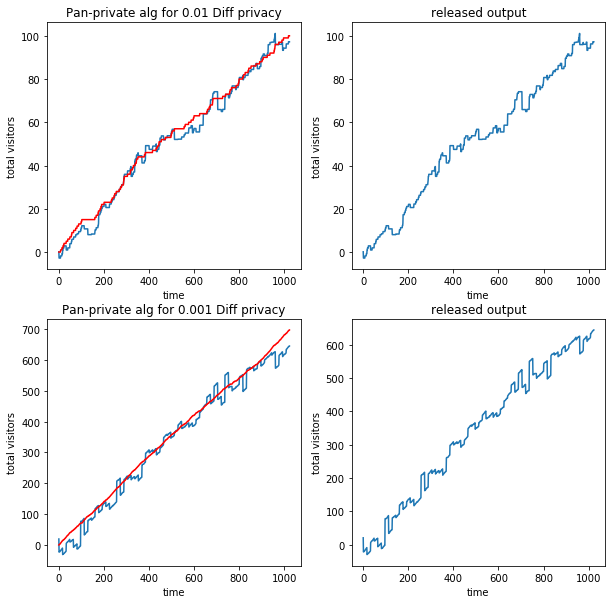

In [58]:
eps_sparse = 0.01*len(visit_sparse)
eps_dense = 0.001*len(visit_dense)

cipher_sparse = Dynamic_counter(data= counter_sparse, eps=eps_sparse)
cipher_dense = Dynamic_counter(data= counter_dense, eps=eps_dense)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(cipher_sparse)
plt.plot(counter_sparse, 'r-')
plt.ylabel('total visitors')
plt.title('Pan-private alg for %.2f Diff privacy'%(eps_sparse/len(visit_sparse)))
plt.xlabel('time')
plt.subplot(222)
plt.ylabel('total visitors')
plt.title('released output')
plt.xlabel('time')
plt.plot(cipher_sparse)
plt.subplot(223)
plt.plot(cipher_dense)
plt.plot(counter_dense, 'r-')
plt.ylabel('total visitors')
plt.title('Pan-private alg for %.3f Diff privacy'%(eps_dense/len(visit_dense)))
plt.xlabel('time')
plt.subplot(224)
plt.plot(cipher_dense)
plt.ylabel('total visitors')
plt.title('released output')
plt.xlabel('time')
plt.show()

In general is possible to proof that for any algorithm we choose is impossible to have differentially private event-level algorithm for counting over T rounds with error in accuracy better than $\Omega(log T)$ (even with $ \epsilon = 1$).